In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import neattext.functions as nfx

In [4]:
df = pd.read_csv('data/emotion_dataset_2.csv')

In [5]:
# preview
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [6]:
df.shape

(34792, 4)

In [7]:
df.shape

(34792, 4)

In [8]:
df.dtypes

Unnamed: 0     int64
Emotion       object
Text          object
Clean_Text    object
dtype: object

In [9]:
df.isnull().sum()

Unnamed: 0      0
Emotion         0
Text            0
Clean_Text    466
dtype: int64

In [10]:
# value Counts of Emotions
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<Axes: xlabel='Emotion'>

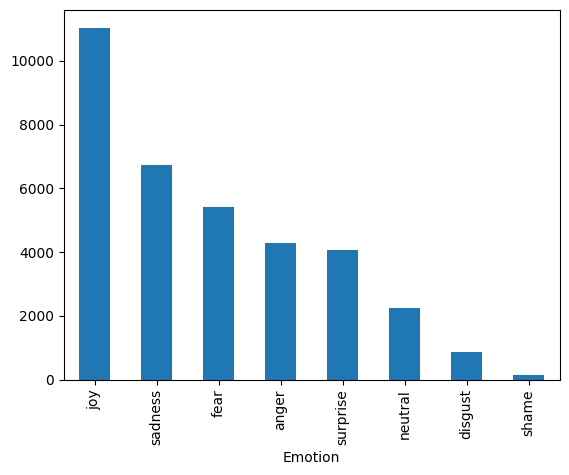

In [11]:
# Vallue Counts of Emotions
df['Emotion'].value_counts().plot(kind='bar')

C:\Users\Yonas\AppData\Local\Temp\ipykernel_4176\1669346050.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Emotion', data=df, palette='Set2')


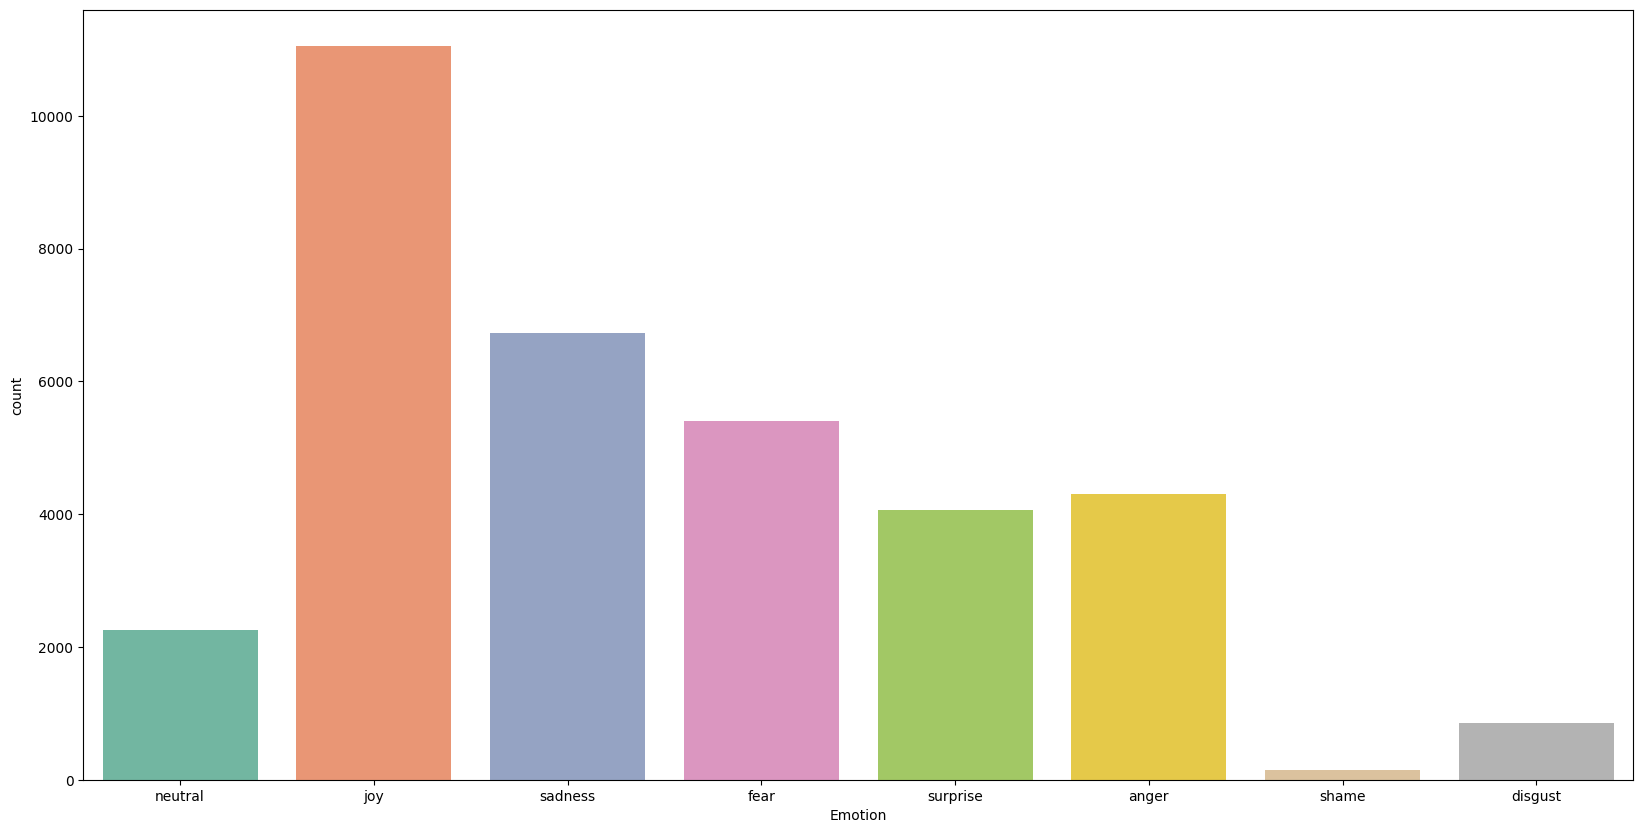

In [12]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Emotion', data=df, palette='Set2')
plt.show()


In [13]:
# Sentiment Analysis
from textblob import TextBlob

In [14]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'
    

In [15]:
# Test Fxn
get_sentiment("I love coding")


'Positive'

In [16]:
df['Sentiment'] = df['Text'].apply(get_sentiment)

In [17]:
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text,Sentiment
0,0,neutral,Why ?,NaN,Neutral
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow,Neutral
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...,Negative
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...,Positive
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...,Neutral


<Axes: xlabel='Emotion,Sentiment'>

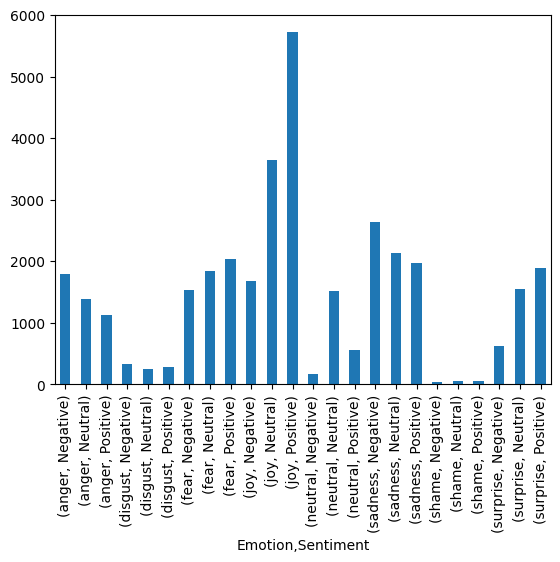

In [18]:
# Compare our Emotion VS Sentiment
df.groupby(['Emotion', 'Sentiment']).size().plot(kind='bar')

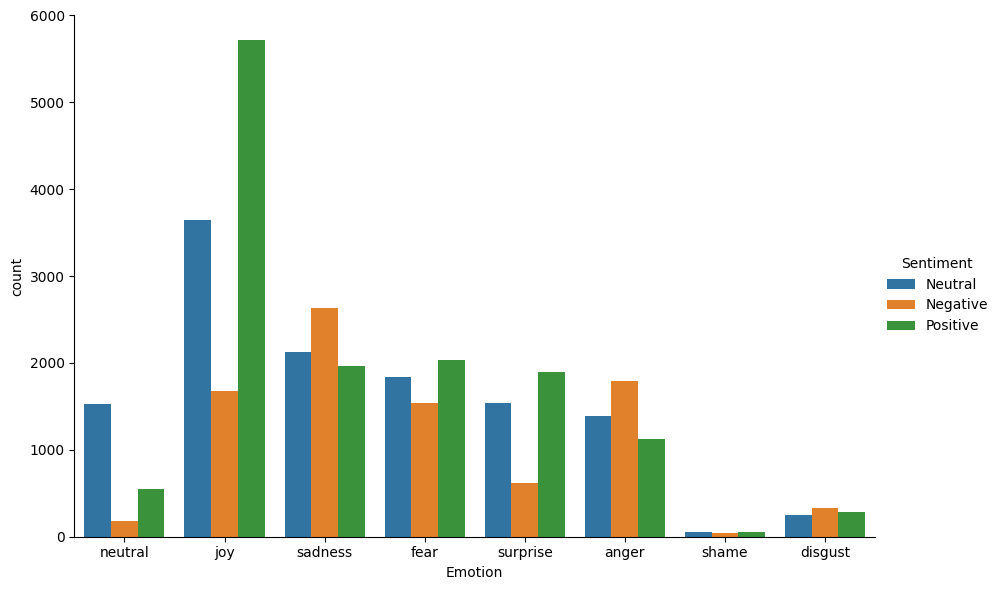

In [19]:
sns.catplot(x='Emotion', hue='Sentiment', data=df, kind='count', height=6, aspect=1.5)
# sns.catplot

In [20]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [21]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_stopwords)

In [22]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_userhandles)

In [23]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_punctuations)

In [24]:
df[['Text', 'Clean_Text']]

,Text,Clean_Text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,A man robbed me today .,man robbed today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


In [25]:
from collections import Counter

In [26]:
def extract_keywords(text, num=50):
    tokens = [tok for tok in text.split()]
    most_common_tokens = Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [27]:
# list of emotions
emotion_list = df['Emotion'].unique().tolist()

In [28]:
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [29]:
joy_list = df[df['Emotion'] == 'joy']['Clean_Text'].tolist()

In [30]:
# Joy document
joy_docx = ' '.join(joy_list)

In [31]:
joy_docx

'Sage Act upgrade list tommorow eye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness    ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang life  Leopold truly happy : hopes prayers beloved son come fruition  feeling fail french #fuckfrench GoodLet   fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhile terribly ecstatic dangerous thing  selected study university Yeah  ’ ages   passed BA exams class results heard selected fot year university Zambia form Chikola secondary school Welp time study days Heading campus rain grad photos feeling awesome    brings  Ive bought Christmas presents trawl loads shops :) shit pants Pure 100% gravy life  Leopold truly happy : hopes prayers beloved son come fruition  Class jamming

In [32]:
keyword_joy = extract_keywords(joy_docx)

In [33]:
keyword_joy

{'day': 729,
 'amp': 678,
 'time': 602,
 'Im': 555,
 'work': 509,
 'like': 476,
 'today': 471,
 'tomorrow': 467,
 'Christmas': 453,
 'love': 393,
 'happy': 368,
 'good': 345,
 'night': 332,
 'got': 328,
 ':)': 311,
 'going': 304,
 'home': 302,
 'school': 297,
 'morning': 288,
 '2': 262,
 'joy': 257,
 'life': 251,
 'hours': 251,
 'week': 231,
 'feel': 227,
 'year': 225,
 'days': 208,
 'tonight': 205,
 'long': 204,
 'people': 201,
 'me': 196,
 'great': 194,
 'sleep': 185,
 'new': 181,
 'family': 181,
 's': 180,
 'God': 177,
 'know': 177,
 'hour': 172,
 'friend': 169,
 'felt': 167,
 'cant': 165,
 'it': 162,
 'feeling': 159,
 'RT': 159,
 'friends': 155,
 'think': 148,
 'excited': 145,
 'right': 142,
 'class': 141}

In [34]:
def plot_most_common_words(mydict, emotion_name):
    df_01 = pd.DataFrame(mydict.items(), columns=['Word', 'Count'])
    plt.figure(figsize=(20, 10))
    plt.title("Plot of {} Most Commen Keywords".format(emotion_name))
    sns.barplot(x='Word', y='Count', data=df_01)
    plt.xticks(rotation=45)
    plt.show()


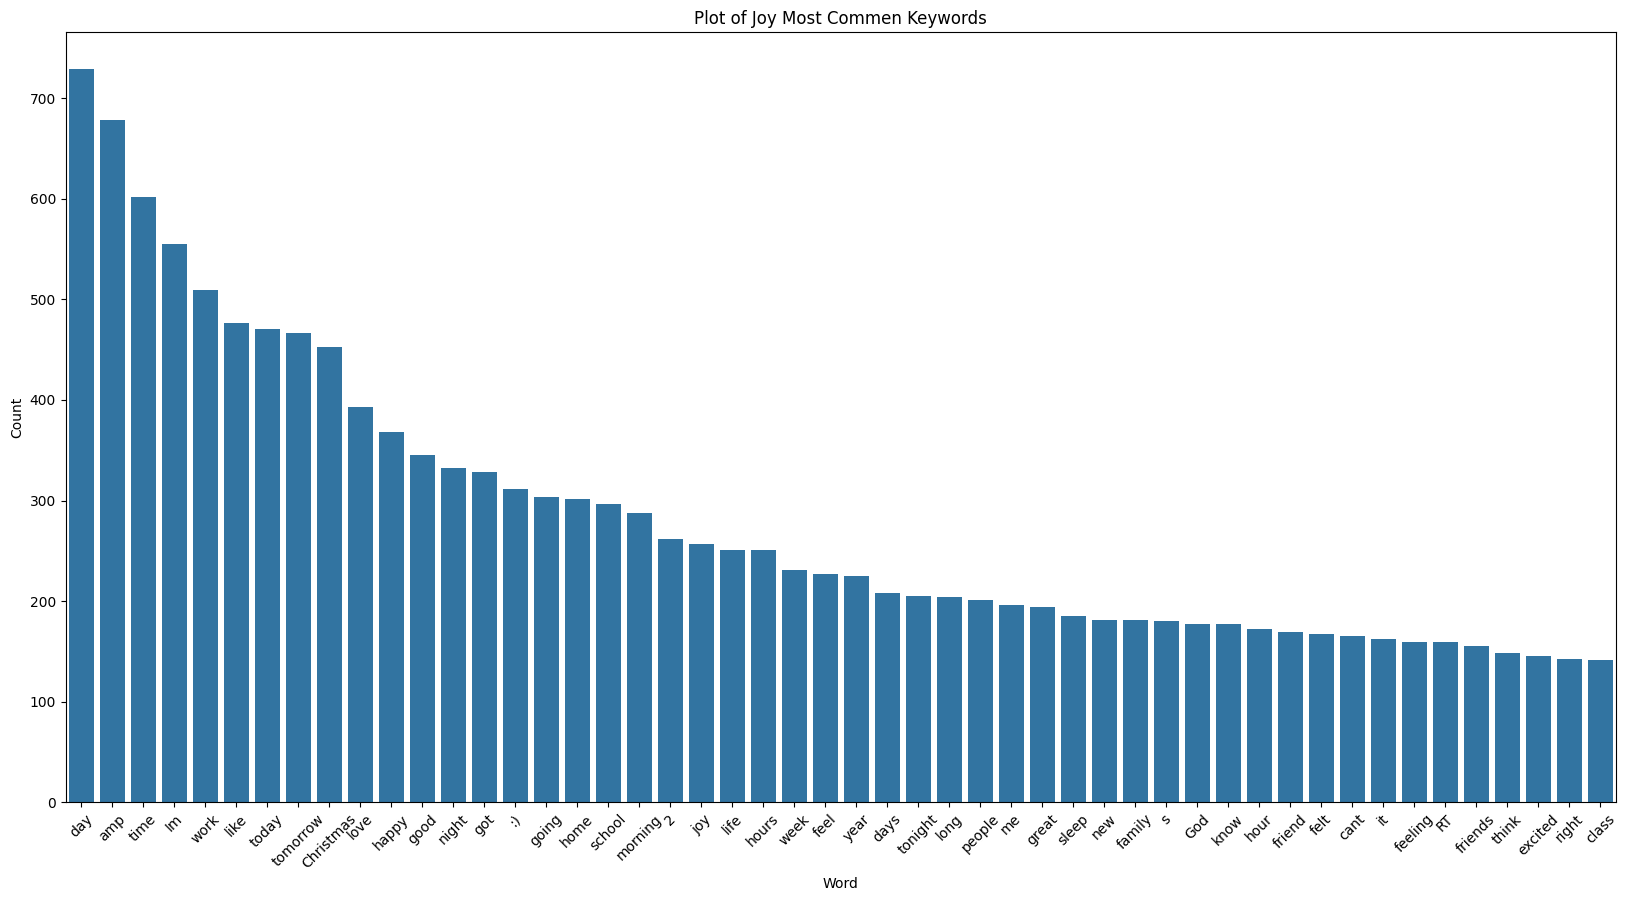

In [35]:
plot_most_common_words(keyword_joy, 'Joy')

In [36]:
surprise_list = df[df['Emotion'] == 'surprise']['Clean_Text'].tolist()
# Document

surprise_docx = ' '.join(surprise_list)
keyword_surprise = extract_keywords(surprise_docx)

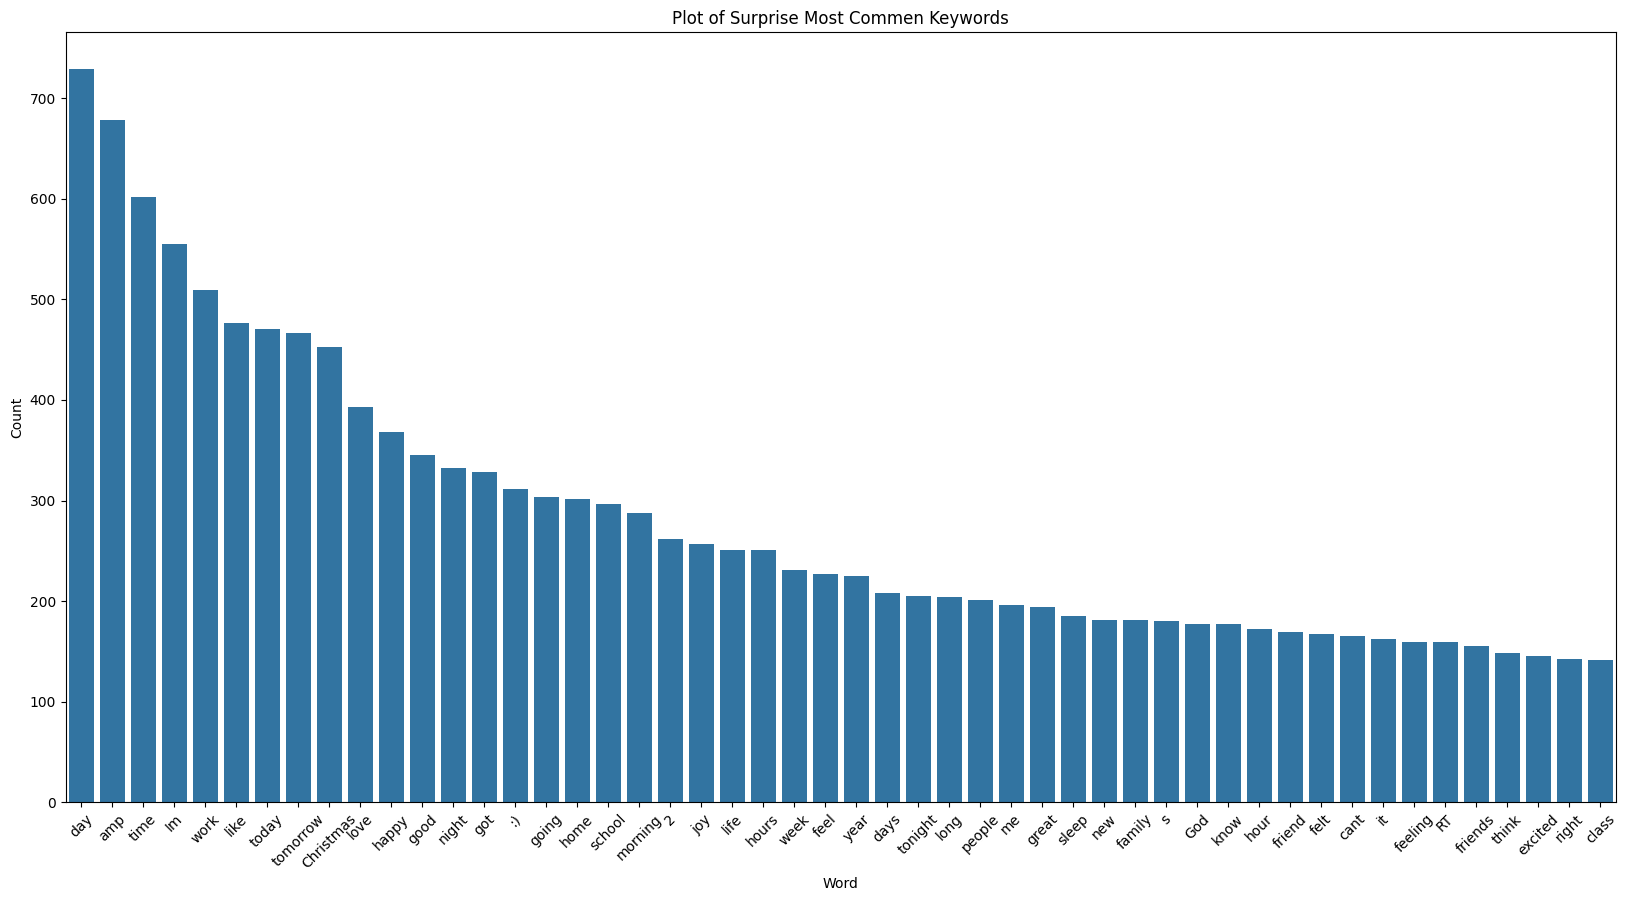

In [37]:
plot_most_common_words(keyword_joy, "Surprise")

In [38]:
#  Word Cloud
from wordcloud import WordCloud



In [39]:
def plot_wordcloud(docx):
    mywordcloud = WordCloud().generate(docx)
    plt.figure(figsize=(20, 10))
    plt.imshow(mywordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

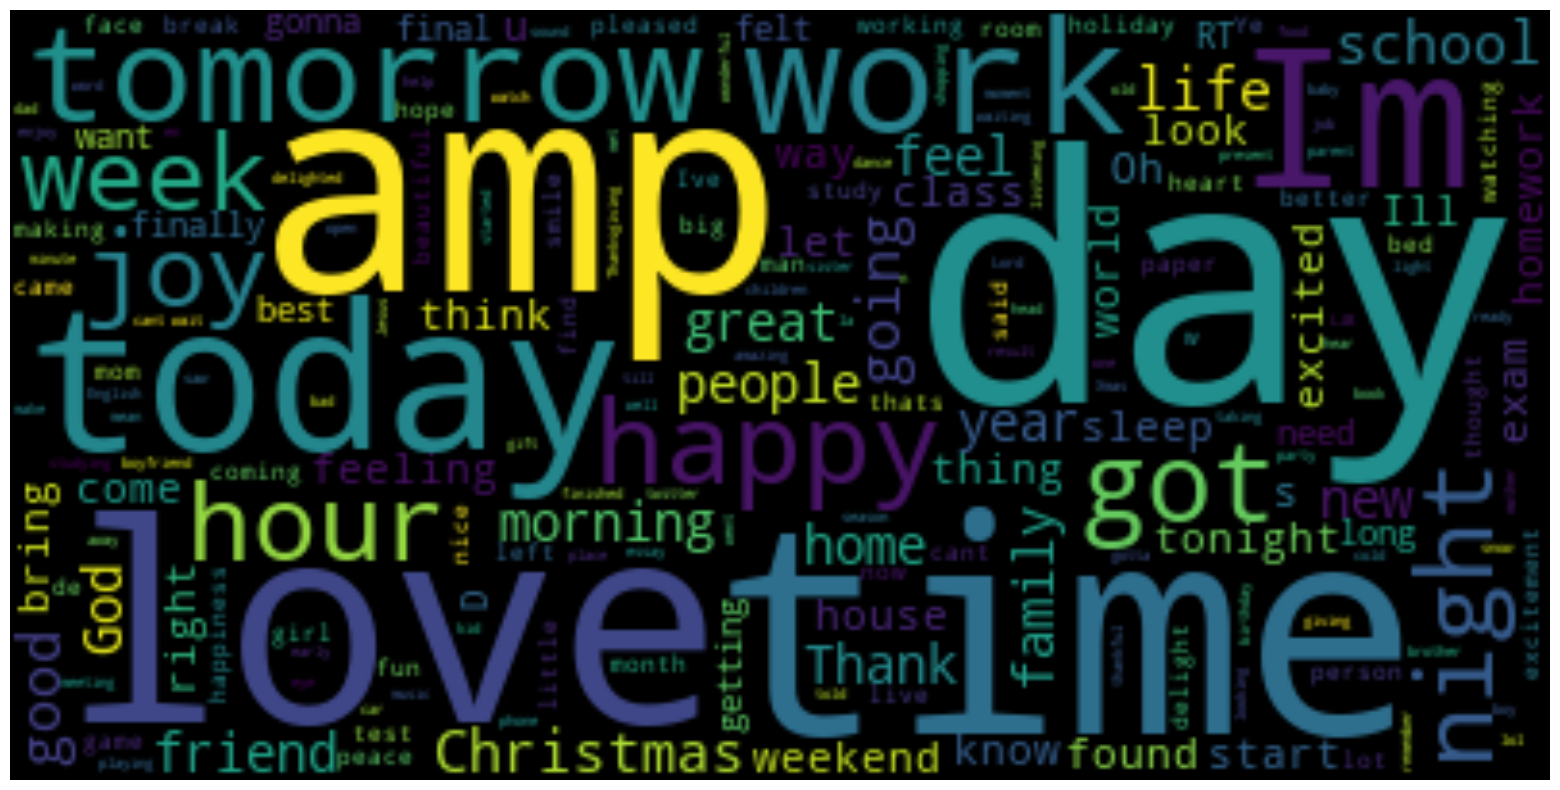

In [40]:
plot_wordcloud(joy_docx)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# split our Dataset
from sklearn.model_selection import train_test_split


In [42]:
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']


In [43]:
Xfeatures

0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                            Youu JEALOUSY #Losing YOU
34791                                think baby dream time
Name: Clean_Text, Length: 34792, dtype: object

In [44]:
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [45]:
# GEt Features By Name
cv.get_feature_names_out()

array(['00', '000', '000ème', ..., 'ღƪ', 'ℕoíʀ', 'ㄒʜℰℳℰ'], dtype=object)

In [46]:
# To Dense Array(Numpy)
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3, random_state=42)

#### Building Mode

In [48]:
nv_model = MultinomialNB()
nv_model.fit(x_train, y_train)


,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [49]:
# Accuracy
#  method 1
nv_model.score(x_test, y_test)

0.5642843456600881

In [50]:
# predictions
y_pred_for_nv = nv_model.predict(x_test)


In [51]:
y_pred_for_nv

array(['fear', 'sadness', 'sadness', ..., 'sadness', 'anger', 'sadness'],
      dtype='<U8')

### Make A Single Prediction
+ Vectorized our Text
+ Applied our model

In [52]:
sample_text = ["I love coding so much"]

In [53]:
vect = cv.transform(sample_text).toarray()


In [54]:
# Make Prediction
nv_model.predict(vect)

array(['joy'], dtype='<U8')

In [55]:
# Check For the Prediction probability(percentage)/confidence score
nv_model.predict_proba(vect)

array([[7.71887420e-03, 4.32378488e-04, 6.13255211e-02, 6.78601776e-01,
        1.91245761e-04, 2.40467259e-01, 1.63388024e-06, 1.12613108e-02]])

In [56]:
# Get all class for our model

nv_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [57]:
np.max(nv_model.predict_proba(vect))

np.float64(0.6786017763391645)

In [58]:
def predict_emotion(sample_text, model):
    myvect = cv.transform(sample_text).toarray()
    prediction = model.predict(myvect)
    pred_proba = model.predict_proba(myvect)
    pred_percentage_for_all = dict(zip(model.classes_, pred_proba[0]))
    print("Prediction:{}, Prediction Score:{}".format(prediction[0], np.max(pred_proba)))
    return pred_percentage_for_all


In [59]:
predict_emotion(sample_text, nv_model)

Prediction:joy, Prediction Score:0.6786017763391645


{np.str_('anger'): np.float64(0.007718874198816227),
 np.str_('disgust'): np.float64(0.0004323784877583124),
 np.str_('fear'): np.float64(0.06132552108584217),
 np.str_('joy'): np.float64(0.6786017763391645),
 np.str_('neutral'): np.float64(0.00019124576121008267),
 np.str_('sadness'): np.float64(0.24046725945228875),
 np.str_('shame'): np.float64(1.6338802443624819e-06),
 np.str_('surprise'): np.float64(0.011261310794677947)}

In [60]:
predict_emotion(["He hates running all day"], nv_model)

Prediction:joy, Prediction Score:0.9089665715897578


{np.str_('anger'): np.float64(0.01036693357152914),
 np.str_('disgust'): np.float64(0.0003195563339480684),
 np.str_('fear'): np.float64(0.009997815369441419),
 np.str_('joy'): np.float64(0.9089665715897578),
 np.str_('neutral'): np.float64(5.800043787193291e-05),
 np.str_('sadness'): np.float64(0.047719525231977804),
 np.str_('shame'): np.float64(4.351322032698918e-07),
 np.str_('surprise'): np.float64(0.022571162333268505)}

#### Model Evaluation

In [62]:
# Classification 
print(classification_report(y_test, y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.64      0.49      0.56      1283
     disgust       0.53      0.03      0.06       292
        fear       0.75      0.60      0.67      1645
         joy       0.51      0.86      0.64      3311
     neutral       0.30      0.02      0.04       675
     sadness       0.56      0.54      0.55      2015
       shame       1.00      0.03      0.05        36
    surprise       0.61      0.27      0.38      1181

    accuracy                           0.56     10438
   macro avg       0.61      0.36      0.37     10438
weighted avg       0.57      0.56      0.53     10438



In [63]:
# Confusion
confusion_matrix(y_test, y_pred_for_nv)

array([[ 633,    0,   58,  373,    7,  199,    0,   13],
       [  31,   10,   25,  132,    2,   81,    0,   11],
       [  79,    2,  984,  353,    4,  160,    0,   63],
       [  76,    1,  100, 2848,    9,  204,    0,   73],
       [  20,    0,   17,  550,   14,   71,    0,    3],
       [  89,    1,   74,  726,    7, 1080,    0,   38],
       [   9,    0,    7,   13,    0,    5,    1,    1],
       [  49,    5,   47,  621,    4,  135,    0,  320]])

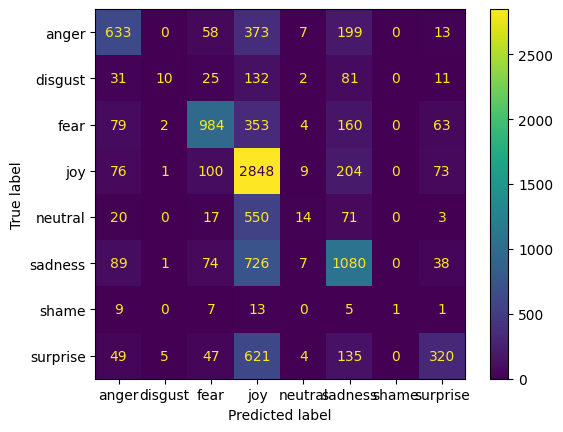

In [67]:
# Plot Confusion 

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(nv_model, x_test, y_test)
plt.show()

#### Save Model

In [68]:
import joblib
model_file = open("emotion_classifire_nv_model.pkl", "wb")
joblib.dump(nv_model, model_file)
model_file.close()

#### Model Interpration
+ Eli5
+ Lime
+ Shap


In [71]:
# Logistic Regression

lr_model = LogisticRegression(max_iter=200)
lr_model.fit(x_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [72]:
# Accuracy
lr_model.score(x_test, y_test)

0.6225330523088715

In [73]:
# Single Predict
predict_emotion(sample_text, lr_model)


Prediction:joy, Prediction Score:0.6996493512870134


{'anger': np.float64(0.024864327214055706),
 'disgust': np.float64(0.012743075769329626),
 'fear': np.float64(0.05017861610703494),
 'joy': np.float64(0.6996493512870134),
 'neutral': np.float64(0.020429828783821928),
 'sadness': np.float64(0.14800412164757934),
 'shame': np.float64(0.0008841579422285427),
 'surprise': np.float64(0.04324652124893641)}

In [78]:
# Interpret Model
import eli5


In [79]:
# show the weifhts For Each Class/Label
eli5.show_weights(lr_model, top=20)

In [81]:
class_names = ylabels.unique().tolist()

In [99]:
feature_names = cv.get_feature_names_out()

In [101]:
eli5.show_weights(lr_model, feature_names=feature_names, target_names = class_names)